In [1]:
import locale

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

locale.setlocale(locale.LC_ALL, 'deu_deu')
locale.format_string('%.2f', 0.5)

'0,50'

In [37]:
sheet_id = '1lv7n6We8ZP_oi7OVp80r9i_YuOtaenrmmwqq0GviuUM'
usage = 'Zaehler'
prices = 'Preise'
url1 = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={usage}'
url2 = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={prices}'

In [38]:
df_usage = pd.read_csv(url1, decimal=',')
df_usage.Zeitstempel = pd.to_datetime(df_usage.Zeitstempel, dayfirst=True)
df_usage.set_index('Zeitstempel', inplace=True)

# ROUND = {'Warmwasser' : 3,
#          'Kaltwasser' : 3,
#          'Waschmaschine' : 3,
#          'Heizung' : 0,
#          'Strom' : 0}
# for column in df_usage.columns:
#     df_usage[column] = np.interp(df_usage.index,
#                                  df_usage[column].dropna().index,
#                                  df_usage[column].dropna())
#     df_usage[column] = df_usage[column].round(ROUND[column])

df_usage = df_usage.ffill()
df_usage

,Warmwasser,Kaltwasser,Waschmaschine,Heizung,Strom
Zeitstempel,,,,,
2019-08-21,0.263,0.508,0.000,0.0,0.18
2019-09-01,0.263,0.508,0.000,0.0,4.00
2019-12-31,14.288,18.026,2.316,1555.0,4.00
2020-01-07,14.288,18.026,2.316,1555.0,1083.00
2020-12-24,14.288,18.026,2.316,1555.0,4057.00
2020-12-31,74.687,80.852,10.652,5601.0,4057.00
2021-12-24,74.687,80.852,10.652,5601.0,6950.00
2021-12-31,151.619,152.084,20.609,8195.0,6950.00
2022-08-05,189.326,192.523,20.609,9758.0,8617.00


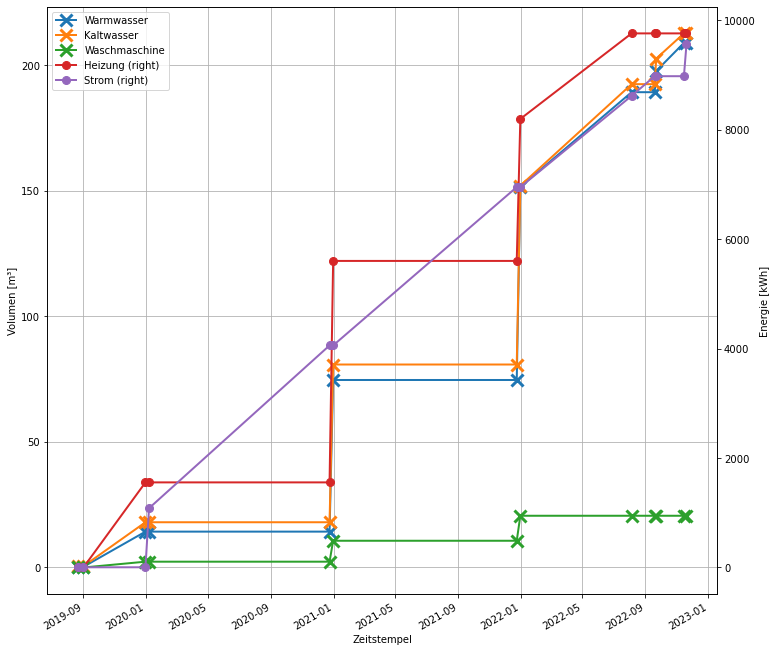

In [26]:
ax1 = df_usage.plot(y=['Warmwasser', 'Kaltwasser', 'Waschmaschine'],
                    grid=True,
                    figsize=(12,12),
                    marker='x',
                    markersize=12,
                    markeredgewidth=3,
                    linewidth=2);
ax2 = df_usage.plot(ax=ax1,
                    y=['Heizung', 'Strom'],
                    secondary_y=['Heizung', 'Strom'],
                    grid=True,
                    markersize=8,
                    marker='o',
                    linewidth=2);

ax1.set_ylabel('Volumen [m³]');
ax2.set_ylabel('Energie [kWh]');


In [30]:
df_usage_diff = df_usage.diff()
df_usage_diff.iloc[0,:]= 0
    
df_yearly_sum = df_usage_diff.resample('1y').sum()
df_yearly_sum

,Warmwasser,Kaltwasser,Waschmaschine,Heizung,Strom
Zeitstempel,,,,,
2019-12-31,14.025,17.518,2.316,1555.0,3.82
2020-12-31,60.399,62.826,8.336,4046.0,4053.00
2021-12-31,76.932,71.232,9.957,2594.0,2893.00
2022-12-31,57.341,60.661,0.000,1563.0,2610.00


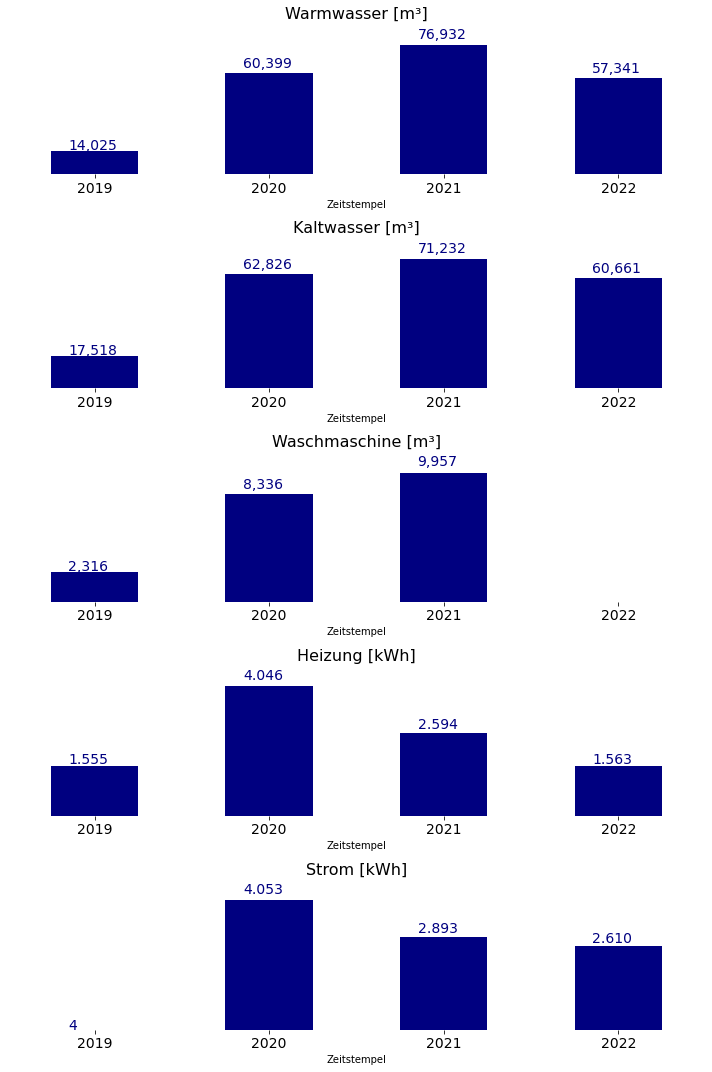

In [31]:
COLOR = 'navy'
PLOT_STYLE = {'Warmwasser' : {'ylabel' : 'm³'},
              'Kaltwasser' : {'ylabel' : 'm³'},
              'Waschmaschine' : {'ylabel' : 'm³'},
              'Heizung' : {'ylabel' : 'kWh'},
              'Strom' : {'ylabel' : 'kWh'}}

fig, ax = plt.subplots(len(PLOT_STYLE), 1, figsize=(10,15))

for ida, style in enumerate(PLOT_STYLE):
    df_yearly_sum.plot(y=style,
                       kind='bar',
                       color=COLOR,
                       rot=0,
                       legend=False,
                       ax=ax[ida]);

    ax[ida].set_title(style + ' [' + PLOT_STYLE[style]['ylabel'] + ']',
                      fontsize=16, 
                      y=1.1)
    
    ax[ida].set_yticks([])
    ax[ida].set_xticklabels(df_yearly_sum.index.year.astype(str),
                            fontsize=14)
    
    ax[ida].spines['top'].set_visible(False)
    ax[ida].spines['right'].set_visible(False)
    ax[ida].spines['bottom'].set_visible(False)
    ax[ida].spines['left'].set_visible(False)
    
    for patch in ax[ida].patches:
        if patch.get_height() > 0:
            ax[ida].text(patch.get_x() + 0.1,
                         patch.get_height() * 1.05,
                         locale.format_string('%%.%df' % (ROUND[style]),
                                              patch.get_height(),
                                              grouping=True),
                         color=COLOR,
                         fontsize=14)
fig.tight_layout()

In [39]:
df_prices = pd.read_csv(url2)
df_prices = df_prices.ffill()
df_prices.Zeitstempel = pd.to_datetime(df_prices.Zeitstempel, dayfirst=True)

FLOAT_COLS = ['Warmwasser', 'Kaltwasser', 'Heizung', 'Strom']
for col in FLOAT_COLS:
    df_prices[col] = df_prices[col].str.replace(',', '.')
    df_prices[col] = df_prices[col].str.replace('€', '')
    df_prices[col] = df_prices[col].astype(float)

df_prices.set_index('Zeitstempel', inplace=True)
df_prices

,Warmwasser,Kaltwasser,Heizung,Strom
Zeitstempel,,,,
2019-01-01,12.5691,3.6993,0.1227,0.2799
2020-01-01,11.0108,4.3554,0.0818,0.3055
2020-07-01,11.0108,4.3554,0.0818,0.2978
2021-01-01,6.9183,3.9522,0.1007,0.3055
2022-06-01,6.9183,3.9522,0.1007,0.3147
2023-01-01,6.9183,3.9522,0.1007,0.5300
